In [73]:
%matplotlib inline
import urllib.request
import json
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point
import pysal as ps
import matplotlib.pyplot as plt
import datetime
import folium
import xlrd
import glob
import os
from datetime import timedelta

os.getcwd()

In [14]:
os.chdir('C:\\Users\\Mandrake\\Desktop\\SMU\\DataMining')
os.getcwd()

'C:\\Users\\Mandrake\\Desktop\\SMU\\DataMining'

In [24]:
df = pd.read_csv('mbd.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 132427 entries, 0 to 132426
Data columns (total 22 columns):
Trip ID                              132427 non-null int64
Duration                             132427 non-null int64
Start Time                           132427 non-null object
End Time                             132427 non-null object
Starting Station ID                  132408 non-null float64
Starting Station Latitude            132379 non-null float64
Starting Station Longitude           132379 non-null float64
Ending Station ID                    132331 non-null float64
Ending Station Latitude              131376 non-null float64
Ending Station Longitude             131376 non-null float64
Bike ID                              132417 non-null float64
Plan Duration                        131661 non-null float64
Trip Route Category                  132427 non-null object
Passholder Type                      132427 non-null object
Starting Lat-Long                    98622 

In [48]:
df.columns = df.columns.str.replace(' ','_')
df['Start_Time']=pd.to_datetime(df['Start_Time'])
df['End_Time']=pd.to_datetime(df['End_Time'])

In [49]:
df.isnull().sum(axis = 0)

Trip_ID                                   0
Duration                                  0
Start_Time                                0
End_Time                                  0
Starting_Station_ID                      19
Starting_Station_Latitude                48
Starting_Station_Longitude               48
Ending_Station_ID                        96
Ending_Station_Latitude                1051
Ending_Station_Longitude               1051
Bike_ID                                  10
Plan_Duration                           766
Trip_Route_Category                       0
Passholder_Type                           0
Starting_Lat-Long                     33805
Ending_Lat-Long                        1051
Neighborhood_Councils_(Certified)     33837
Council_Districts                     33837
Zip_Codes                             33837
LA_Specific_Plans                    116590
Precinct_Boundaries                    1099
Census_Tracts                          1099
dtype: int64

In [50]:
df_clean = df.dropna()

In [51]:
print(df_clean.Starting_Station_ID.nunique())
print(df_clean.Starting_Station_Latitude.nunique())
print(df_clean.Starting_Station_Longitude.nunique())
print(df_clean.Ending_Station_ID.nunique())
print(df_clean.Ending_Station_Latitude.nunique())
print(df_clean.Ending_Station_Longitude.nunique())
print(df_clean.Bike_ID.nunique())

62
120
112
11
21
21
758


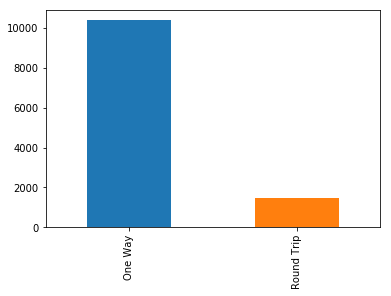

In [40]:
df_clean.Trip_Route_Category.value_counts().plot(kind='bar')
plt.show()

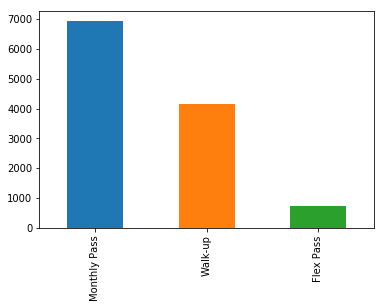

In [41]:
df_clean.Passholder_Type.value_counts().plot(kind='bar')
plt.show()


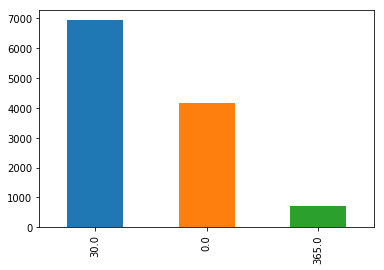

In [42]:
df_clean.Plan_Duration.value_counts().plot(kind='bar')
plt.show()

In [43]:
df_clean.Bike_ID.value_counts().head()

6487.0    52
6115.0    34
6328.0    32
5931.0    32
6616.0    31
Name: Bike_ID, dtype: int64

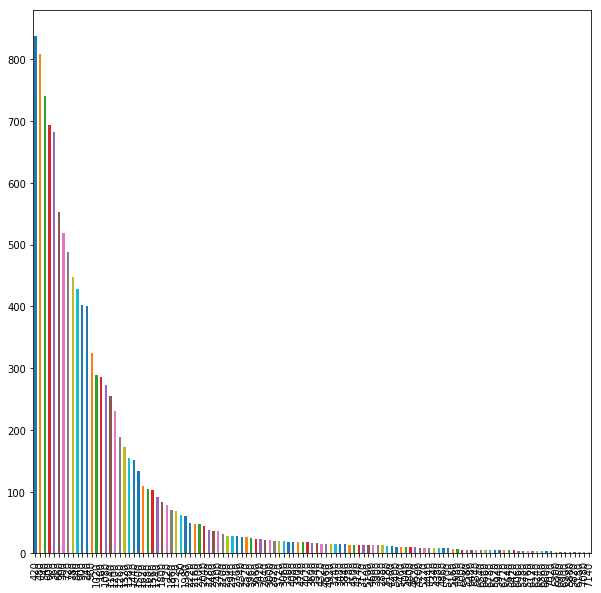

In [44]:
time_filter = df_clean.Duration<2*60*60
df_clean[time_filter].Duration.value_counts().plot(kind='bar', figsize=(10,10))
plt.show()

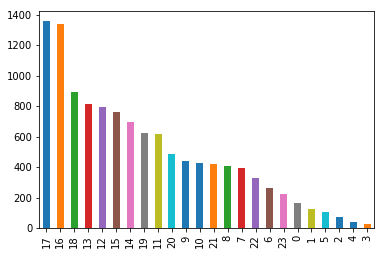

In [52]:
df_clean.Start_Time.dt.hour.value_counts().plot(kind='bar')
plt.show()

In [70]:

import matplotlib.pyplot as plt
import geopandas as gpd
import pysal as ps
from pysal.contrib.viz import mapping as maps
import palettable as pltt
from seaborn import palplot



In [74]:
url = "https://bikeshare.metro.net/stations/json/"
hdr = {'User-Agent': 'Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.11 (KHTML, like Gecko) Chrome/23.0.1271.64 Safari/537.11',
       'Accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,*/*;q=0.8',
       'Accept-Charset': 'ISO-8859-1,utf-8;q=0.7,*;q=0.3',
       'Accept-Encoding': 'none',
       'Accept-Language': 'en-US,en;q=0.8',
       'Connection': 'keep-alive'}

req = urllib.request.Request(url, headers=hdr)
try:
    response = urllib.request.urlopen(req)
except urllib.request.HTTPError as e:
    print(e.fp.read())
station_json = json.loads(response.read())

stations = gpd.GeoDataFrame.from_features(station_json['features'])

station_map = folium.Map([34.047677, -118.3073917], tiles='CartoDB positron', zoom_start=11)
for index, row in stations.iterrows():
    folium.Marker([row.geometry.centroid.y, row.geometry.centroid.x]).add_to(station_map)
station_map